<a href="https://colab.research.google.com/github/MGalal01/Timeseries-Forecasting-/blob/main/gold_timeseries_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime
import pandas as pd
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['GC=F']  # Use the correct ticker symbol for gold

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Access the data
gold_data = globals()['GC=F']

# Now you can work with the gold_data DataFrame
print(gold_data.head())

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker             GC=F         GC=F         GC=F         GC=F         GC=F   
Date                                                                          
2022-12-15  1777.199951  1777.199951  1801.000000  1774.800049  1801.000000   
2022-12-16  1790.000000  1790.000000  1791.400024  1777.900024  1777.900024   
2022-12-19  1787.699951  1787.699951  1796.300049  1785.599976  1791.599976   
2022-12-20  1815.900024  1815.900024  1821.400024  1786.500000  1786.500000   
2022-12-21  1815.900024  1815.900024  1821.400024  1814.400024  1817.400024   

Price      Volume  
Ticker       GC=F  
Date               
2022-12-15    421  
2022-12-16    206  
2022-12-19     79  
2022-12-20     51  
2022-12-21     35  


In [18]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-12-15 to 2024-12-13
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GC=F)  502 non-null    float64
 1   (Close, GC=F)      502 non-null    float64
 2   (High, GC=F)       502 non-null    float64
 3   (Low, GC=F)        502 non-null    float64
 4   (Open, GC=F)       502 non-null    float64
 5   (Volume, GC=F)     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


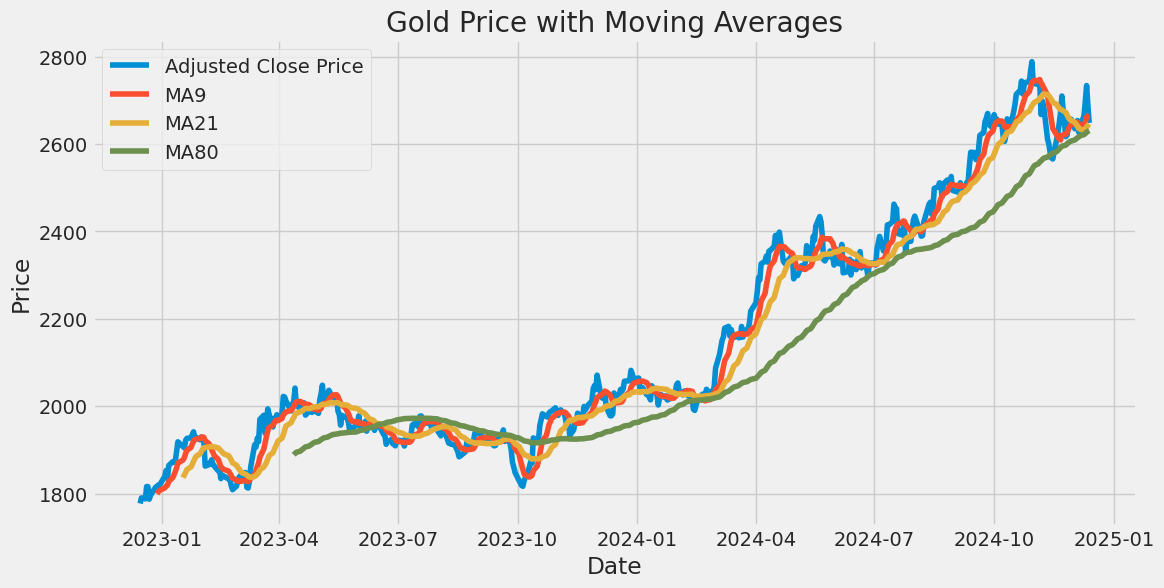

In [19]:
# Calculate moving averages
gold_data['MA9'] = gold_data['Adj Close'].rolling(window=9).mean()
gold_data['MA21'] = gold_data['Adj Close'].rolling(window=21).mean()
gold_data['MA80'] = gold_data['Adj Close'].rolling(window=80).mean()

# Plot the adjusted close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Adj Close'], label='Adjusted Close Price')
plt.plot(gold_data['MA9'], label='MA9')
plt.plot(gold_data['MA21'], label='MA21')
plt.plot(gold_data['MA80'], label='MA80')
plt.title('Gold Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

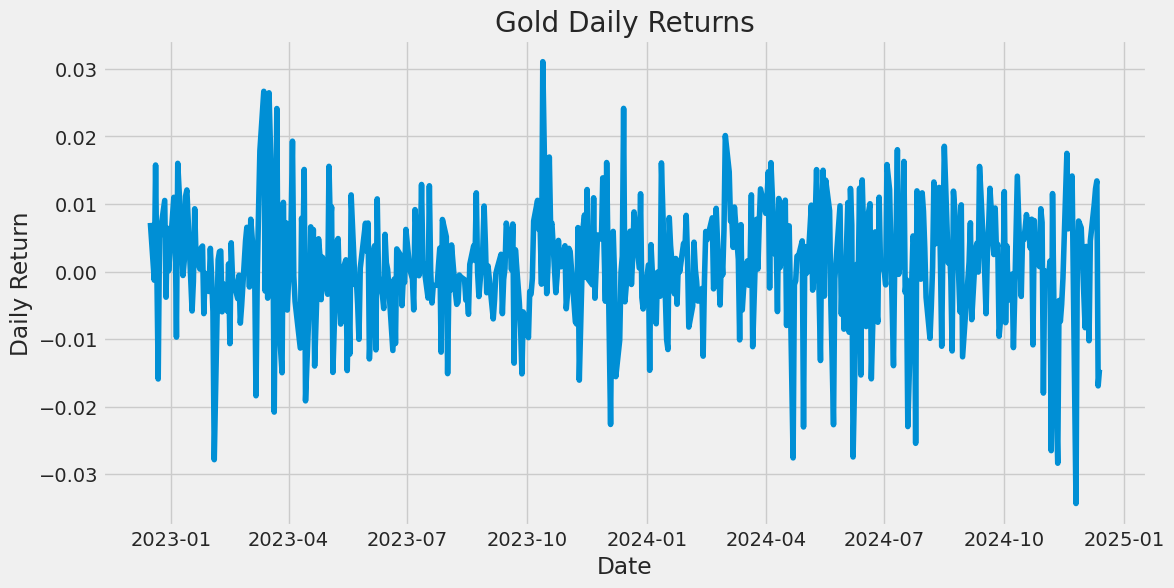

In [25]:
# Calculate daily returns
gold_data['Daily Return'] = gold_data['Adj Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Daily Return'])
plt.title('Gold Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [26]:
# Calculate the average daily return
average_daily_return = gold_data['Daily Return'].mean()
print(f"Average Daily Return: {average_daily_return}")

Average Daily Return: 0.0008362424349651177


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - loss: 0.0239 - val_loss: 0.0257
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.0219 - val_loss: 0.0085
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0058 - val_loss: 0.1031
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0053 - val_loss: 0.0420
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0070 - val_loss: 0.0042
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.0049 - val_loss: 0.0081
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0022 - val_loss: 0.0114
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 12/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0018 - val_loss: 0.0028


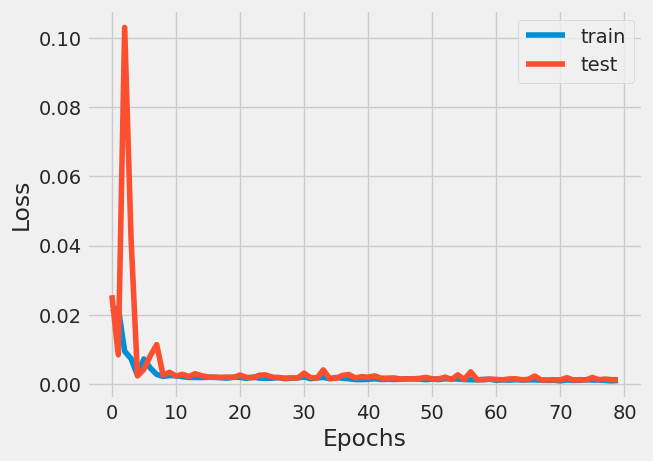

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 21, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 21, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 635,555 (2.42 MB)

 Trainable params: 211,851 (827.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 423,704 (1.62 MB)

None
Train RMSE: 24.70165351805679
Test RMSE: 35.8045911619608


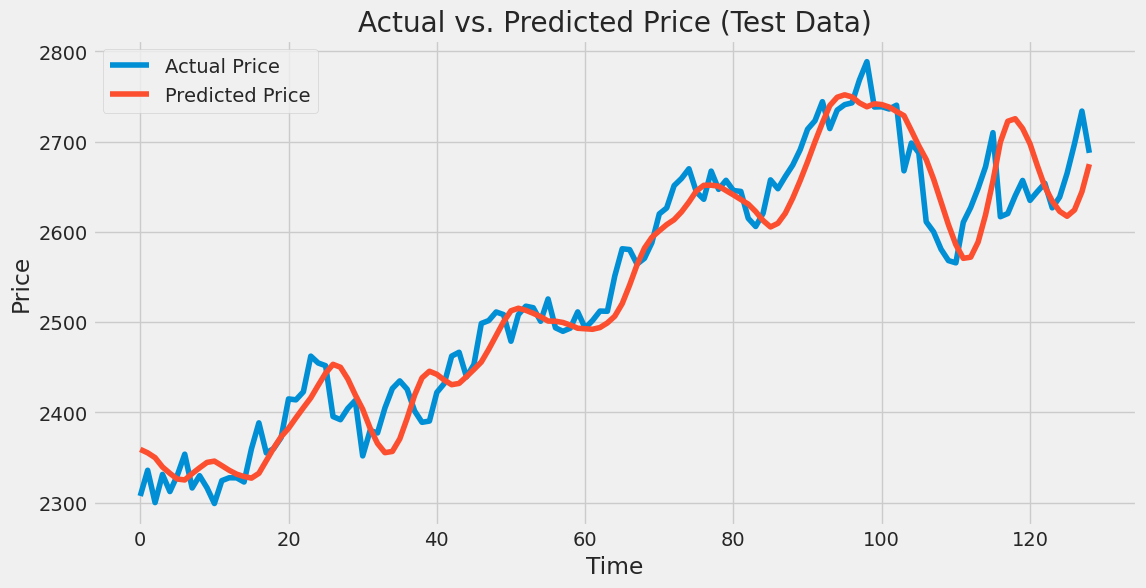

In [35]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler()
data = gold_data['Adj Close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 21  # Number of previous days to consider
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, Y_train, epochs=80, batch_size=100, validation_data = (X_test, Y_test),shuffle = False)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Example prediction (last data point in the test set)
last_ten_days = scaled_data[-look_back:]
last_ten_days = np.reshape(last_ten_days,(1,look_back, 1))
predicted_price = model.predict(last_ten_days)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Price for next day: {predicted_price[0,0]}")
# plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')     #validation/test loss
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(model.summary())

from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE for training and testing sets
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Actual Price')
plt.plot(test_predict[:,0], label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (Test Data)')
plt.legend()
plt.show()